# Cosmology Ex 2 Week 8

Matter Power Spectrum

In [1]:
%pip install camb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 15.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for camb: filename=camb-1.5.0-py3-none-any.whl size=1081529 sha256=e3b3642c41aa6eb2812bbcc21a2669b5df690a874a8f4effd4eb2f973f4113e7
  Stored in directory: /root/.cache/pip/wheels/56/8e/da/c29f503739e0e2dcf9b93784cd7067004e33cd930449600c50
Successfully built camb


In [2]:
# import modules:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.integrate as integrate
import camb

In [3]:
# define parameters:
Omegam = 0.3
OmegaL = 1 - Omegam

In [4]:
z=np.array([0.,0.8,10,100,1000])

# set parameters to match our cosmological model:
pars = camb.CAMBparams();
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122);
pars.InitPower.set_params(ns=0.965);
pars.set_matter_power(redshifts=z,kmax=200.0);

Note: redshifts have been re-sorted (earliest first)


In [10]:
#Linear spectra
pars.NonLinear = camb.model.NonLinear_none
results = camb.get_results(pars)
kh, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=100, npoints = 200)

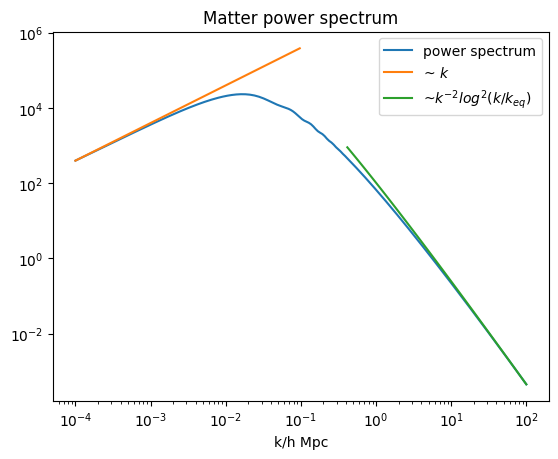

In [17]:
plt.loglog(kh, pk[0,:], label='linear power spectrum');
plt.xlabel('k/h Mpc');
plt.title('Matter power spectrum')

a=pk[0,0]/kh[0]                               ##scaling
plt.plot(kh[0:100],kh[0:100]*a, label='~ $k$')
v=1.1*kh**(-3)*np.log(kh/0.015)**2
b=pk[0,-1]/v[-1]                              ##scaling
plt.plot(kh[120:],b*v[120:], label='~$k^{-2}log^2(k/k_{eq})$')

plt.legend();

$P(k)=A(\frac{k}{k_{eq}})^{n_s}$

$\log{P(k)}=\log{A}+n_s\log{k}-n_{s}\log{k_{eq}}$

$n_s=\frac{d\log{P(k)}}{d\log k}$

n_s= 0.9645396295825911


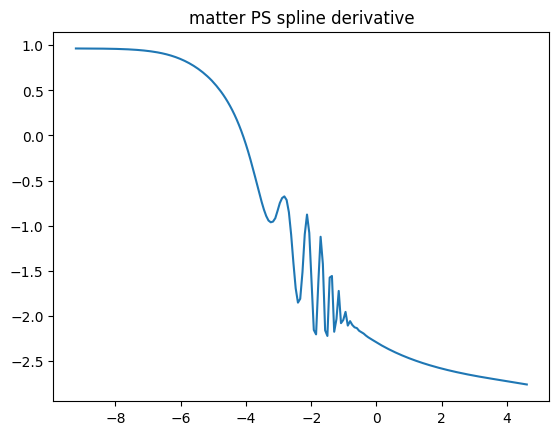

In [19]:
spline=scipy.interpolate.CubicSpline(np.log(kh), np.log(pk[0,:]));
plt.plot(np.log(kh), spline(np.log(kh),1))
plt.title('matter PS spline derivative');

print('n_s=',spline(np.log(kh),1)[0])